### Importing the dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Collection & Analysis

In [2]:
## load the dataset from csv file to pandas dataframe and print first 5 rows of the dataframe

insurance_dataset = pd.read_csv("insurance.csv")
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [4]:
## getting some informations about the DataSet

insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
## Checking the missing values in each column
insurance_dataset.isnull().sum()

# There are no null/missing values in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#### Categorical features:
# - sex
# - region
# - smoker

#### target Variable
# - charges

### Data Analysis

In [7]:
## Statistical Measures of the dataset

insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


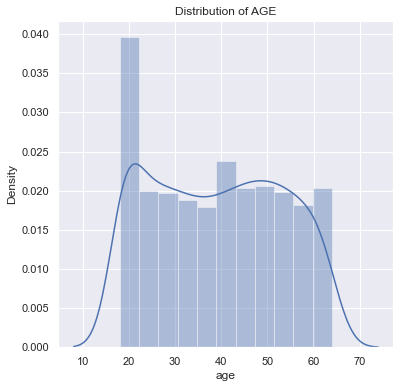

In [8]:
## Distribution of Age value

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title("Distribution of AGE")
plt.show()

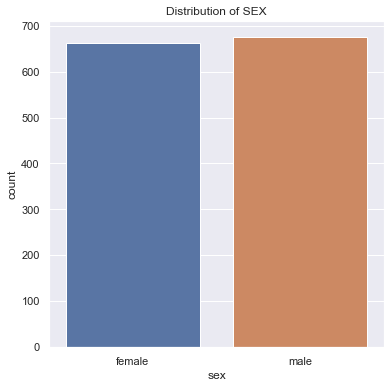

In [9]:
# Distribution of GENDER
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Distribution of SEX')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 432x432 with 0 Axes>

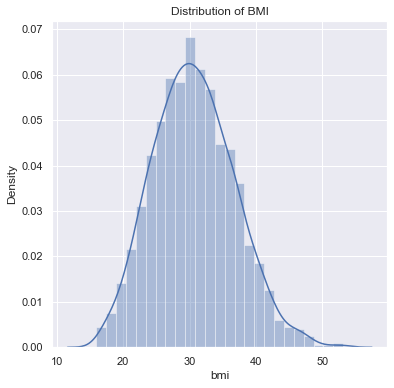

In [11]:
# Distribution of BMI(BodyMassIndex)

plt.figure(figsize=(6,6))
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title("Distribution of BMI")
plt.show()

In [12]:
# normal distribution
# most of the values in midrange

In [13]:
# Normal BMI Range--> 18.5 to 24.9
# < 18.5 --> Under weight
# > 24.9 --> Over Weight

In [14]:
# in our dataset, we can see most of them are over weight

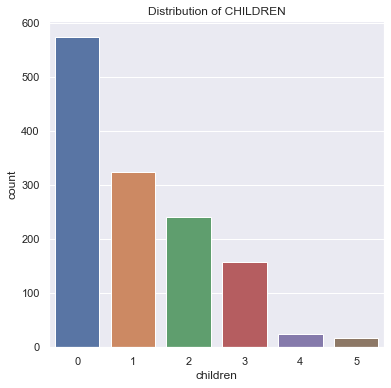

In [15]:
# Distribution of Children

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Distribution of CHILDREN')
plt.show()

In [16]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

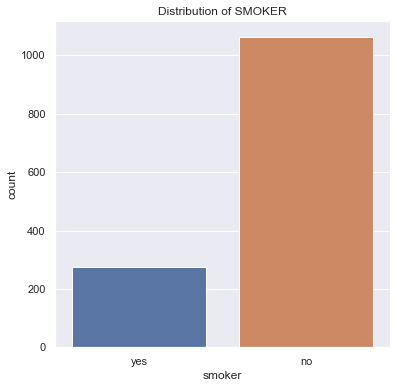

In [17]:
# Distribution of Smoker

plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Distribution of SMOKER')
plt.show()

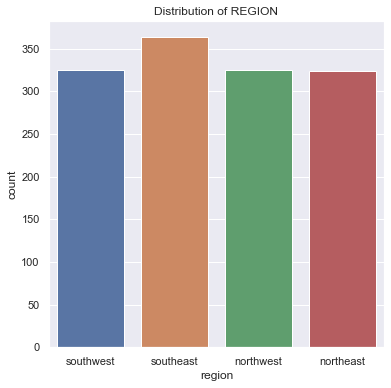

In [18]:
# Distribution of Region

plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Distribution of REGION')
plt.show()

In [19]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 432x432 with 0 Axes>

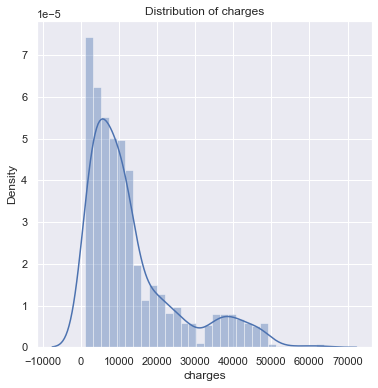

In [20]:
# Distribution of charges

plt.figure(figsize=(6,6))
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title("Distribution of charges")
plt.show()

### Data PreProcessing

#### Encoding Categorical Features

In [21]:
## Encoding sex column

insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)

## Encoding Smoker column
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)

## Encoding region column
insurance_dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

In [22]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


### Splitting the features and target

In [23]:
X = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

In [24]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [25]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Splitting the data into train and test

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (936, 6) (402, 6)


### Model Training

In [28]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [29]:
# Prediction on training data

training_data_prediction = regressor.predict(X_train)

In [30]:
# R square value( 0 to 1) 
from sklearn import metrics
r2_train = metrics.r2_score(y_train, training_data_prediction)
r2_train

0.7361379636575588

In [31]:
# Prediction on test data

test_data_prediction = regressor.predict(X_test)

In [32]:
# R square value( 0 to 1) 
r2_test = metrics.r2_score(y_test, test_data_prediction)
r2_test

0.7814630889863545

### Building a Predictive System

In [33]:
# (age, sex, bmi, children, smoker, region)
# {'sex': {'male': 0, 'female': 1}
#


input_data = (31, 1, 25.74, 0, 1, 0)

# Changing the imput_data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print("The Insurance cost is USD ", prediction[0])

[4150.75316267]
The Insurance cost is USD  4150.753162669147
